<a href="https://colab.research.google.com/github/DonghyunKim98/is_design_prototype/blob/main/%ED%99%95%EB%A5%A0%EB%B0%8F%ED%86%B5%EA%B3%842022_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정보시스템학과 - 확률및통계 2022
# 5조 - 배달 어플리케이션에 미치는 요소들의 상관관계 분석

In [1]:
# 기본 라이브러리 import
import pandas as pd
import numpy as np
from google.colab import drive
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from scipy import stats
import statistics

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/infosys2022-statistics-raw-data.csv'

data = pd.read_csv(file_path)

print(data.shape)
data.head(5)

(129, 76)


,타임스탬프,1-1 귀하의 성별은 무엇입니까?,1-2 귀하의 연령은 무엇입니까?,"1-3 귀하의 동거 가족 인원수는 몇 명인가요? (1인가구의 경우, 본가 구성원을 포함해주세요)",1-3 최근 2달 이내 배달앱을 사용한 경험이 있나요?,2. 제일 중요하다고 생각하는 요소 [배달비],2. 제일 중요하다고 생각하는 요소 [배달시간],2. 제일 중요하다고 생각하는 요소 [별점],2. 제일 중요하다고 생각하는 요소 [리뷰수],3-1 1인당 가격이 12000원 이하일 때 [배달비],...,6-4 21:01 ~ 01:00 (야식) [배달시간],6-4 21:01 ~ 01:00 (야식) [별점],6-4 21:01 ~ 01:00 (야식) [리뷰수],추가 설문조사 참여 여부,1. 귀하의 MBTI는 무엇인가요? (16 personalities 기준),2. 한달에 배달을 몇 번 시켜먹나요?,3. 배달을 시킬 때 배달 최소 금액을 고려하시나요?,4. 자주 시켜먹는 음식의 종류는 무엇인가요?,5. 배달 어플의 필터링 기능을 사용 하시나요?,"6. 귀하의 전화번호는 무엇인가요?\n\n※ 기프티콘을 제공하기 위함으로만 사용되며, 기프티콘 제공이 완료되면 파기됩니다."
0,2022. 11. 15 오후 1:34:19,여자,20대,4명,네,4.0,4.0,5.0,5.0,5.0,...,4.0,4.0,3.0,예,ENFJ,1~5번,예,디저트,예,010-8813-4221
1,2022. 11. 15 오후 1:38:16,남자,20대,5명,네,5.0,4.0,2.0,3.0,5.0,...,4.0,2.0,2.0,예,ISFP,6~10번,예,한식,예,01089365435
2,2022. 11. 15 오후 1:38:57,남자,20대,4명,네,5.0,5.0,5.0,3.0,5.0,...,4.0,4.0,3.0,아니오,NaN,NaN,NaN,NaN,NaN,NaN
3,2022. 11. 15 오후 1:42:45,남자,20대,4명,네,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,4.0,예,INTJ,1~5번,예,일식,예,01030503469
4,2022. 11. 15 오후 1:43:00,여자,20대,4명,네,5.0,2.0,5.0,1.0,3.0,...,4.0,4.0,1.0,예,ESFJ,1~5번,아니오,한식,예,010-9356-1755


## 데이터 전처리과정
1. 배달앱을 사용하지 않는 사용자 제거
2. 각 column 의 네이밍 변환 -> 너무 길어서 눈에 안들어옴

In [3]:
# 데이터 전처리 ① - 배달앱을 사용하지 않은 사용자 제거
data = data.drop(data[data['1-3 최근 2달 이내 배달앱을 사용한 경험이 있나요?']=='아니오'].index)

# 배달 어플 사용 여부를 묻는 column 제거
data = data.drop('1-3 최근 2달 이내 배달앱을 사용한 경험이 있나요?',axis=1)
data.shape

(120, 75)

In [4]:
# 데이터 전처리 ② - 각 column 의 네이밍 변환

column_names = data.columns.values.tolist()
prefix_names = ['noCondition',
                'foodCostUnder12','foodCostUnder18','foodCostUnder24','foodCostOver24',
                'eatAlone','eatWithFriends2to3', 'eatWithFriendsOver4','eatWithFamily',
                'weekday','holiday','specialDay',
                'lunch','snack','dinner','midnight',
                ]
suffix_names = ['cost','time','rating','numberOfReview']
renamedColumn = {
    '1-1 귀하의 성별은 무엇입니까?' : 'userSex',
    '1-2 귀하의 연령은 무엇입니까?' : 'userAge',
    '1-3 귀하의 동거 가족 인원수는 몇 명인가요? (1인가구의 경우, 본가 구성원을 포함해주세요)' : 'numberOfFamily'
}
for idx1, prefix in enumerate(prefix_names):
    for idx2, suffix in enumerate(suffix_names):
      renamedColumn[column_names[4*(idx1+1) + idx2]]=(prefix+'-'+suffix)
  

data = data.rename(columns=renamedColumn)

data.head(3)

,타임스탬프,userSex,userAge,numberOfFamily,noCondition-cost,noCondition-time,noCondition-rating,noCondition-numberOfReview,foodCostUnder12-cost,foodCostUnder12-time,...,midnight-time,midnight-rating,midnight-numberOfReview,추가 설문조사 참여 여부,1. 귀하의 MBTI는 무엇인가요? (16 personalities 기준),2. 한달에 배달을 몇 번 시켜먹나요?,3. 배달을 시킬 때 배달 최소 금액을 고려하시나요?,4. 자주 시켜먹는 음식의 종류는 무엇인가요?,5. 배달 어플의 필터링 기능을 사용 하시나요?,"6. 귀하의 전화번호는 무엇인가요?\n\n※ 기프티콘을 제공하기 위함으로만 사용되며, 기프티콘 제공이 완료되면 파기됩니다."
0,2022. 11. 15 오후 1:34:19,여자,20대,4명,4.0,4.0,5.0,5.0,5.0,4.0,...,4.0,4.0,3.0,예,ENFJ,1~5번,예,디저트,예,010-8813-4221
1,2022. 11. 15 오후 1:38:16,남자,20대,5명,5.0,4.0,2.0,3.0,5.0,4.0,...,4.0,2.0,2.0,예,ISFP,6~10번,예,한식,예,01089365435
2,2022. 11. 15 오후 1:38:57,남자,20대,4명,5.0,5.0,5.0,3.0,5.0,4.0,...,4.0,4.0,3.0,아니오,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 분석 및 시각화
1. 조절변수 내에서 독립변수 히스토그램
2. 조절변수 내에서 다양한 독립변수 기술통계분석
3. 조절변수 간의 하나의 독립변수 기술통계분석
4. 조절변수 내에서 독립변수간 피어슨 상관관계 분석
5. 영가설 검증

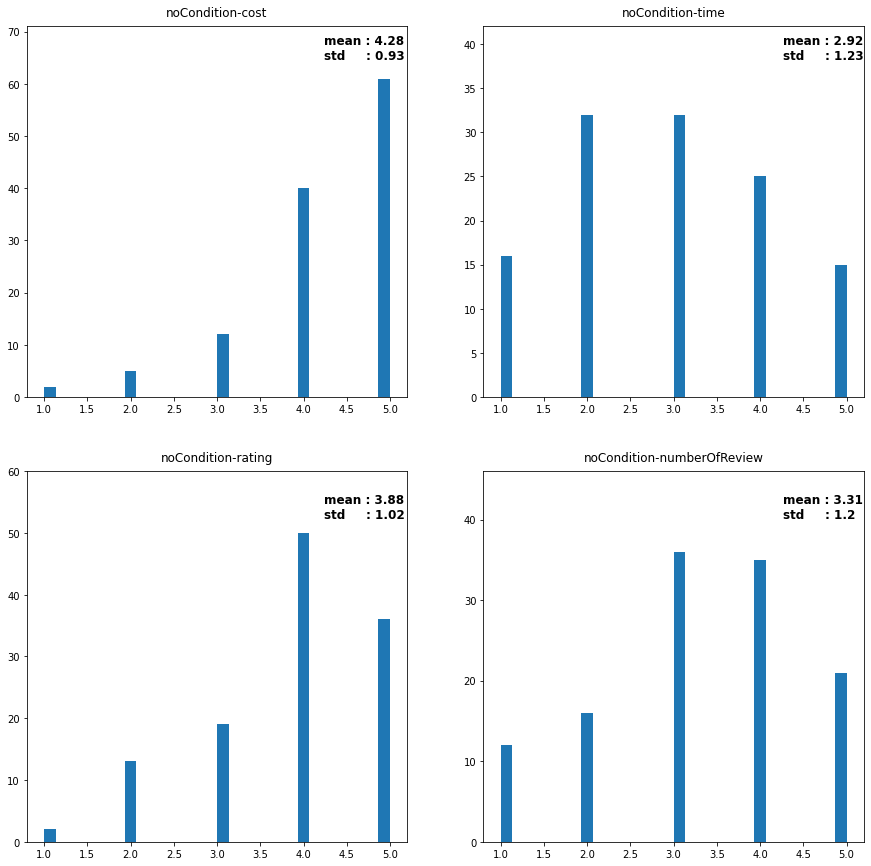

In [5]:
# ① 조절변수 내에서 독립변수 히스토그램

def printMeanAndStd (columnName):
  ret  = 'mean : '
  ret += str(round(data[columnName].mean(),2)) 
  ret += '\n'
  ret += 'std     : '
  ret += str(round(data[columnName].std(),2))
  return ret

def showHistogramByPrefix (prefixIndex):
    prefixName = prefix_names[prefixIndex]
    suffix_names = ['cost','time','rating','numberOfReview']
    figure, axis = plt.subplots(2, 2,figsize=(15, 15))
    for idx, suffix in enumerate(suffix_names):
        axis[int(idx/2),idx%2].hist(data[prefixName + '-' + suffix],bins=30)
        axis[int(idx/2),idx%2].set_title(prefixName + '-' + suffix,pad=10)
        axis[int(idx/2),idx%2].set_ylim(top=data.value_counts(prefixName+'-'+suffix).max()+10)

    plt.figtext(.4,.85,printMeanAndStd(prefixName+'-cost'),fontSize='large',fontWeight='bold')
    plt.figtext(.825,.85,printMeanAndStd(prefixName+'-time'),fontSize='large',fontWeight='bold')
    plt.figtext(.4,.425,printMeanAndStd(prefixName+'-rating'),fontSize='large',fontWeight='bold')
    plt.figtext(.825,.425,printMeanAndStd(prefixName+'-numberOfReview'),fontSize='large',fontWeight='bold')
    plt.show()  


showHistogramByPrefix(0)

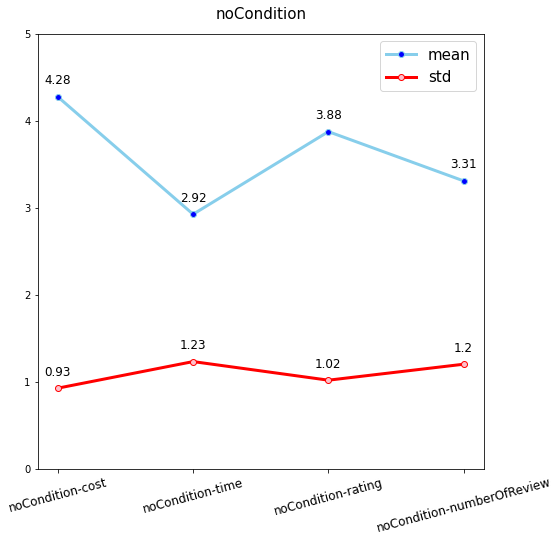

In [6]:
# ② 조절변수 내에서 다양한 독립변수 기술통계분석
def showMeanAndStdInOneModerate (prefixIndex):
    prefixName = prefix_names[prefixIndex]

    dataBySingleModerate = data.iloc[:,range((prefixIndex+1)*4,(prefixIndex+2)*4)]

    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(dataBySingleModerate.mean().index,
             dataBySingleModerate.mean(),
             color='skyblue',
             marker='o', markerfacecolor='blue',
             markersize=6,lineWidth=3,
             label='mean'
             )
    plt.plot(dataBySingleModerate.std().index,
             dataBySingleModerate.std(),
             color='red',
             marker='o', markerfacecolor='pink',
             markersize=6,lineWidth=3,
             label='std'
             )
    for idx in range(len(dataBySingleModerate.mean().index)):
      ax.text(dataBySingleModerate.mean().index[idx],
              dataBySingleModerate.mean()[idx] +0.15 ,
              round(dataBySingleModerate.mean()[idx],2), 
              size=12, horizontalalignment='center')
      ax.text(dataBySingleModerate.std().index[idx],
              dataBySingleModerate.std()[idx] +0.15 ,
              round(dataBySingleModerate.std()[idx],2), 
              size=12, horizontalalignment='center')
    plt.title(prefixName,size=15,pad=15)
    plt.ylim([0,5])
    plt.xticks(rotation=15,fontSize=12)
    plt.legend(prop={'size':15})
    plt.show()

showMeanAndStdInOneModerate(0)

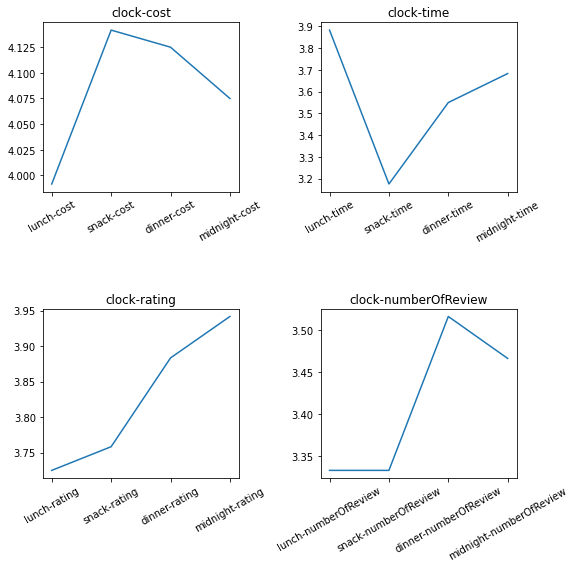

In [7]:
# ③ 조절변수 간의 하나의 독립변수 기술통계분석
moderateColumnIndexesList = [
    [8,12,16,20], # 음식 가격
    [24,28,32],   # 같이 먹는 사람 (가족 제외)
    [40,44,48],   # 배달 날짜
    [52,56,60,64] # 배달 시간
    ]
moderateNames=['foodCost','numberOfPeople','date','clock']

def showPlotByModerates (moderateIndex):
  modetaeColumnIndexes = moderateColumnIndexesList[moderateIndex]
  moderateName = moderateNames[moderateIndex]
  
  costByModerates = data.iloc[:,modetaeColumnIndexes]
  timeByModerates = data.iloc[:,[x+1 for x in modetaeColumnIndexes]]
  ratingByModerates = data.iloc[:,[x+2 for x in modetaeColumnIndexes]]
  reviewByModerates = data.iloc[:,[x+3 for x in modetaeColumnIndexes]]

  moderatedIndependentValues = [costByModerates,timeByModerates,ratingByModerates,reviewByModerates]
  suffix_names = ['cost','time','rating','numberOfReview']

  figure, axis = plt.subplots(2, 2,figsize=(8, 8))

  for idx, suffix in enumerate(suffix_names):
    axis[int(idx/2),idx%2].plot(moderatedIndependentValues[idx].mean().index,moderatedIndependentValues[idx].mean())
    axis[int(idx/2),idx%2].set_title(moderateName + '-' + suffix)
    axis[int(idx/2),idx%2].tick_params(axis='x', labelrotation = 30)

  plt.tight_layout(h_pad=5) # 겹치지 않게 설정, 여백설정
  plt.show()

showPlotByModerates(3)

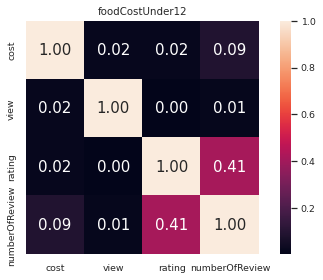

In [8]:
# ④ 조절변수 내에서 독립변수간 피어슨 상관관계 분석
def correlationHitmap (prefixIndex):
    prefixName = prefix_names[prefixIndex]
    conditionCols = []
    for suffix in suffix_names:
      conditionCols.append(prefixName+'-'+suffix)
    Corr = data[conditionCols].corr(method='pearson')
    cols_view=['cost','view','rating','numberOfReview']
    sns.set(font_scale=0.85)
    hm = sns.heatmap(Corr.values,
                    cbar = True,
                    annot= True,
                    square= True,
                    fmt = '.2f',
                    annot_kws = {'size': 15},
                    yticklabels = cols_view,
                    xticklabels = cols_view)

    plt.title(prefixName)
    plt.tight_layout()
    plt.show()

correlationHitmap(1)

In [9]:
# ⑤ 영가설 검증
# ttest_ind : 두 변량의 평균이 같을 확률을 t-검정으로 진행
# 0.01 보다 낮음 -> 두 변량의 평균이 같을 확률이 1% 미만임 -> 영가설 기각
# 0.01 보다 큼  -> 두 변량의 평균이 같을 확률이 1% 이상임 -> 영가설 채택

def nullHypothesisTest (significanceLevel=0.01, **kwards):
  for idx1, prefix in enumerate(prefix_names):
    for idx2, suffix in enumerate(suffix_names):
      if suffix == 'cost' :7
        continue
      pValue = stats.ttest_ind(data[prefix+'-cost'],data[prefix+'-'+suffix],equal_var=False).pvalue
      if pValue<significanceLevel :
        print(prefix,':','cost -',suffix,'의 영가설은 p 값', round(pValue,4),'으로 유의수준 '+ str(100-int(significanceLevel*100))+'%에서', '\033[1m'+'기각됨 (평균이 같지 않음)'+'\033[0m')
      else :
        print(prefix,':','cost -',suffix,'의 영가설은 p 값', round(pValue,4),'로 유의수준 '+str(100-int(significanceLevel*100))+'%에서','\033[1m'+'채택됨 (평균이 같음)'+'\033[0m')
    print('---------------------------')

nullHypothesisTest(significanceLevel=0.05)

noCondition : cost - time 의 영가설은 p 값 0.0 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
noCondition : cost - rating 의 영가설은 p 값 0.0016 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
noCondition : cost - numberOfReview 의 영가설은 p 값 0.0 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
---------------------------
foodCostUnder12 : cost - time 의 영가설은 p 값 0.0 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
foodCostUnder12 : cost - rating 의 영가설은 p 값 0.2101 로 유의수준 95%에서 채택됨 (평균이 같음)
foodCostUnder12 : cost - numberOfReview 의 영가설은 p 값 0.0 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
---------------------------
foodCostUnder18 : cost - time 의 영가설은 p 값 0.0 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
foodCostUnder18 : cost - rating 의 영가설은 p 값 0.7259 로 유의수준 95%에서 채택됨 (평균이 같음)
foodCostUnder18 : cost - numberOfReview 의 영가설은 p 값 0.0054 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
---------------------------
foodCostUnder24 : cost - time 의 영가설은 p 값 0.0029 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
foodCostUnder24 : cost - rating 의 영가설은 p 값 0.0231 으로 유의수준 95%에서 기각됨 (평균이 같지 않음)
foodCostUnder24 : cost - numberOfReview 의 영가설은 p 값 0.60